# Data Exploration

### Visualization of relationships between variables 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Data
Flow_data = pd.read_csv("WRD_flow_data_feb_2021.csv")
Power_data = pd.read_csv("WRD_power_data_feb_2021.csv")


In [3]:
print('-'*30)
print("Valid X and Y data value Choices")
print('-'*30)

print('-'*30)
print("Flow Data")
print('-'*30)
for col in Flow_data.columns:
    print(col)
print('-'*30)
print("Power Data")
print('-'*30)
for col in Power_data.columns:
    print(col)

# Merge Data into one dataframe for easy plotting
Data = pd.merge(Flow_data,Power_data,how='outer')

------------------------------
Valid X and Y data value Choices
------------------------------
------------------------------
Flow Data
------------------------------
Date Time
UV1_mgd
UV2_mgd
RO_total_feed_flow_gpm
RO_train1_s1_permeate_flow_gpm
RO_train1_s2_permeate_flow_gpm
RO_train1_s3_permeate_flow_gpm
RO_train2_s1_permeate_flow_gpm
RO_train2_s2_permeate_flow_gpm
RO_train2_s3_permeate_flow_gpm
RO_train3_s1_permeate_flow_gpm
RO_train3_s2_permeate_flow_gpm
RO_train3_s3_permeate_flow_gpm
RO_train4_s1_permeate_flow_gpm
RO_train4_s2_permeate_flow_gpm
RO_train4_s3_permeate_flow_gpm
RO_total_permeate_flow_gpm
------------------------------
Power Data
------------------------------
Date Time
UF_pump1_power_kW
UF_pump2_power_kW
UF_pump3_power_kW
UF_pump4_power_kW
PRO_feed_pump1_kW
PRO_feed_pump2_kW
PRO_feed_pump3_kW
PRO_feed_pump4_KW
PRO_interstage_pump1_kW
PRO_interstage_pump2_kW
PRO_interstage_pump3_kW
PRO_interstage_pump4_kW
TSRO_feed_pump1_kW
TSRO_feed_pump2_kW
TSRO_feed_pump3_kW
TSRO_

In [9]:
# User input to define x and y data
x_data_name = "RO_train1_s1_permeate_flow_gpm"
x_data_name = "RO_train1_permeate_flow_gpm"
# y_data_name_list = ["PRO_feed_pump1_kW","PRO_interstage_pump1_kW","TSRO_feed_pump1_kW"]
y_data_name_list = ["SEC"]
plot_title = "Train 1 SEC vs. Train 1 Flow"

### Adding Derived Quantities to plot

In [12]:
# Specific Energy of RO 
# Power from the three pumps / volumetric flowrate of the permeate
Data['RO_train1_permeate_flow_gpm'] = Data['RO_train1_s1_permeate_flow_gpm']+Data['RO_train1_s2_permeate_flow_gpm']+Data['RO_train1_s3_permeate_flow_gpm']
Data["SEC_kW/gpm"] = (Data["PRO_feed_pump1_kW"]+Data["PRO_interstage_pump1_kW"]+Data["TSRO_feed_pump1_kW"]) / Data['RO_train1_permeate_flow_gpm']

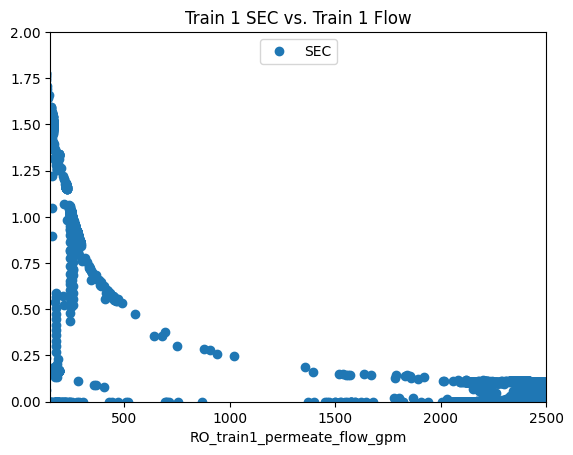

In [15]:
# Create Plot
x_data = Data[x_data_name]
for y_data_name in y_data_name_list:
    y_data = Data[y_data_name]
    plt.plot(x_data,y_data,'o',label=y_data_name)
plt.title(plot_title)
plt.xlabel(x_data_name)
plt.legend()

#Adjust Axes as needed
plt.xlim(150,2500)
plt.ylim(0,2)
plt.show()